In [1]:
# General-purpose libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For statistical data visualization

from sklearn.preprocessing import LabelEncoder,StandardScaler # For Encoding and Scaling

from sklearn.cluster import DBSCAN # For DBSCAN clustering

from sklearn.decomposition import PCA # For PCA use

from sklearn.cluster import KMeans # For Kmean Clustering

import scipy.cluster.hierarchy as sch # For dendrogram Vistualization

from sklearn.cluster import AgglomerativeClustering # For Agglomerative Clustering

from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs # For spectral clustering

from sklearn.metrics import silhouette_score # For silhoutte_score purpose

# Warning control
import warnings
warnings.filterwarnings("ignore")  # To suppress warnings

In [2]:

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df.tail(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
430,1,3,3097,4230,16483,575,241,2080
431,1,3,8533,5506,5160,13486,1377,1498
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
df.shape

(440, 8)

In [6]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
loan_num_cols = df.select_dtypes(include = ['int'])
loan_num_cols



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

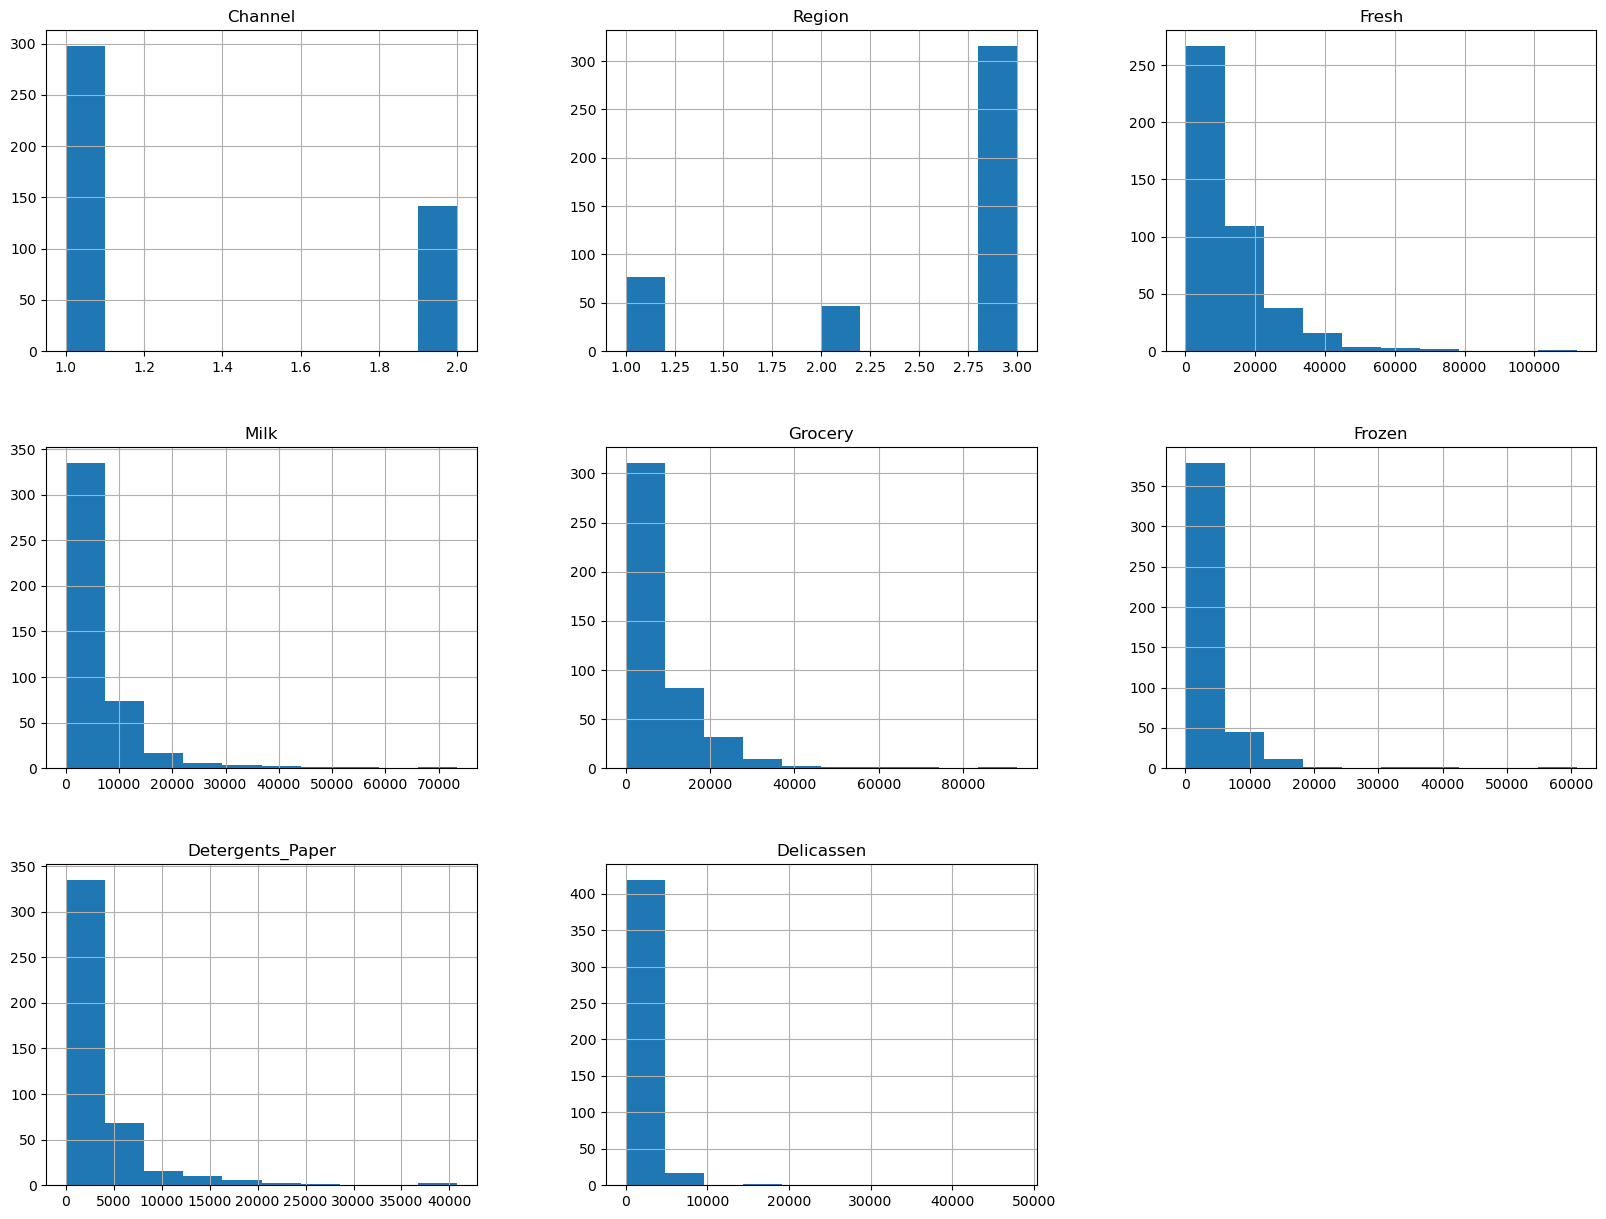

In [9]:
loan_num_cols.hist(figsize = (20,15))

In [10]:
frozen_groceries = df.groupby('Grocery')['Frozen'].value_counts(normalize=True)
print(frozen_groceries)

Grocery  Frozen
3        4407      1.0
137      75        1.0
218      3157      1.0
223      862       1.0
245      1991      1.0
                  ... 
45828    36        1.0
55571    7782      1.0
59598    3254      1.0
67298    131       1.0
92780    1026      1.0
Name: proportion, Length: 440, dtype: float64


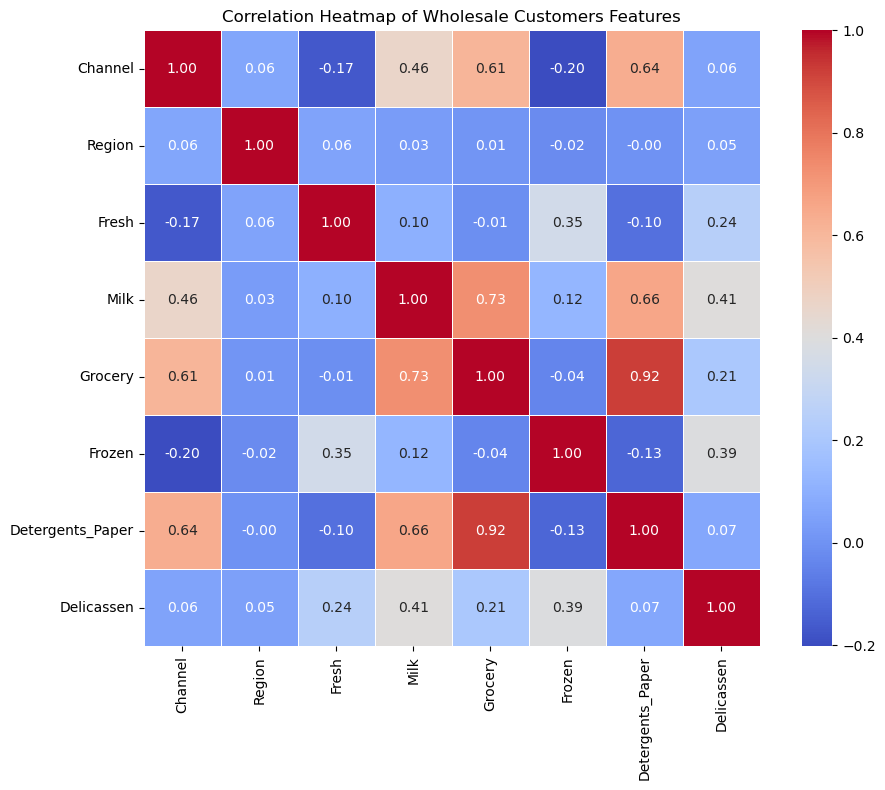

In [11]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Wholesale Customers Features")
plt.tight_layout()
plt.show()

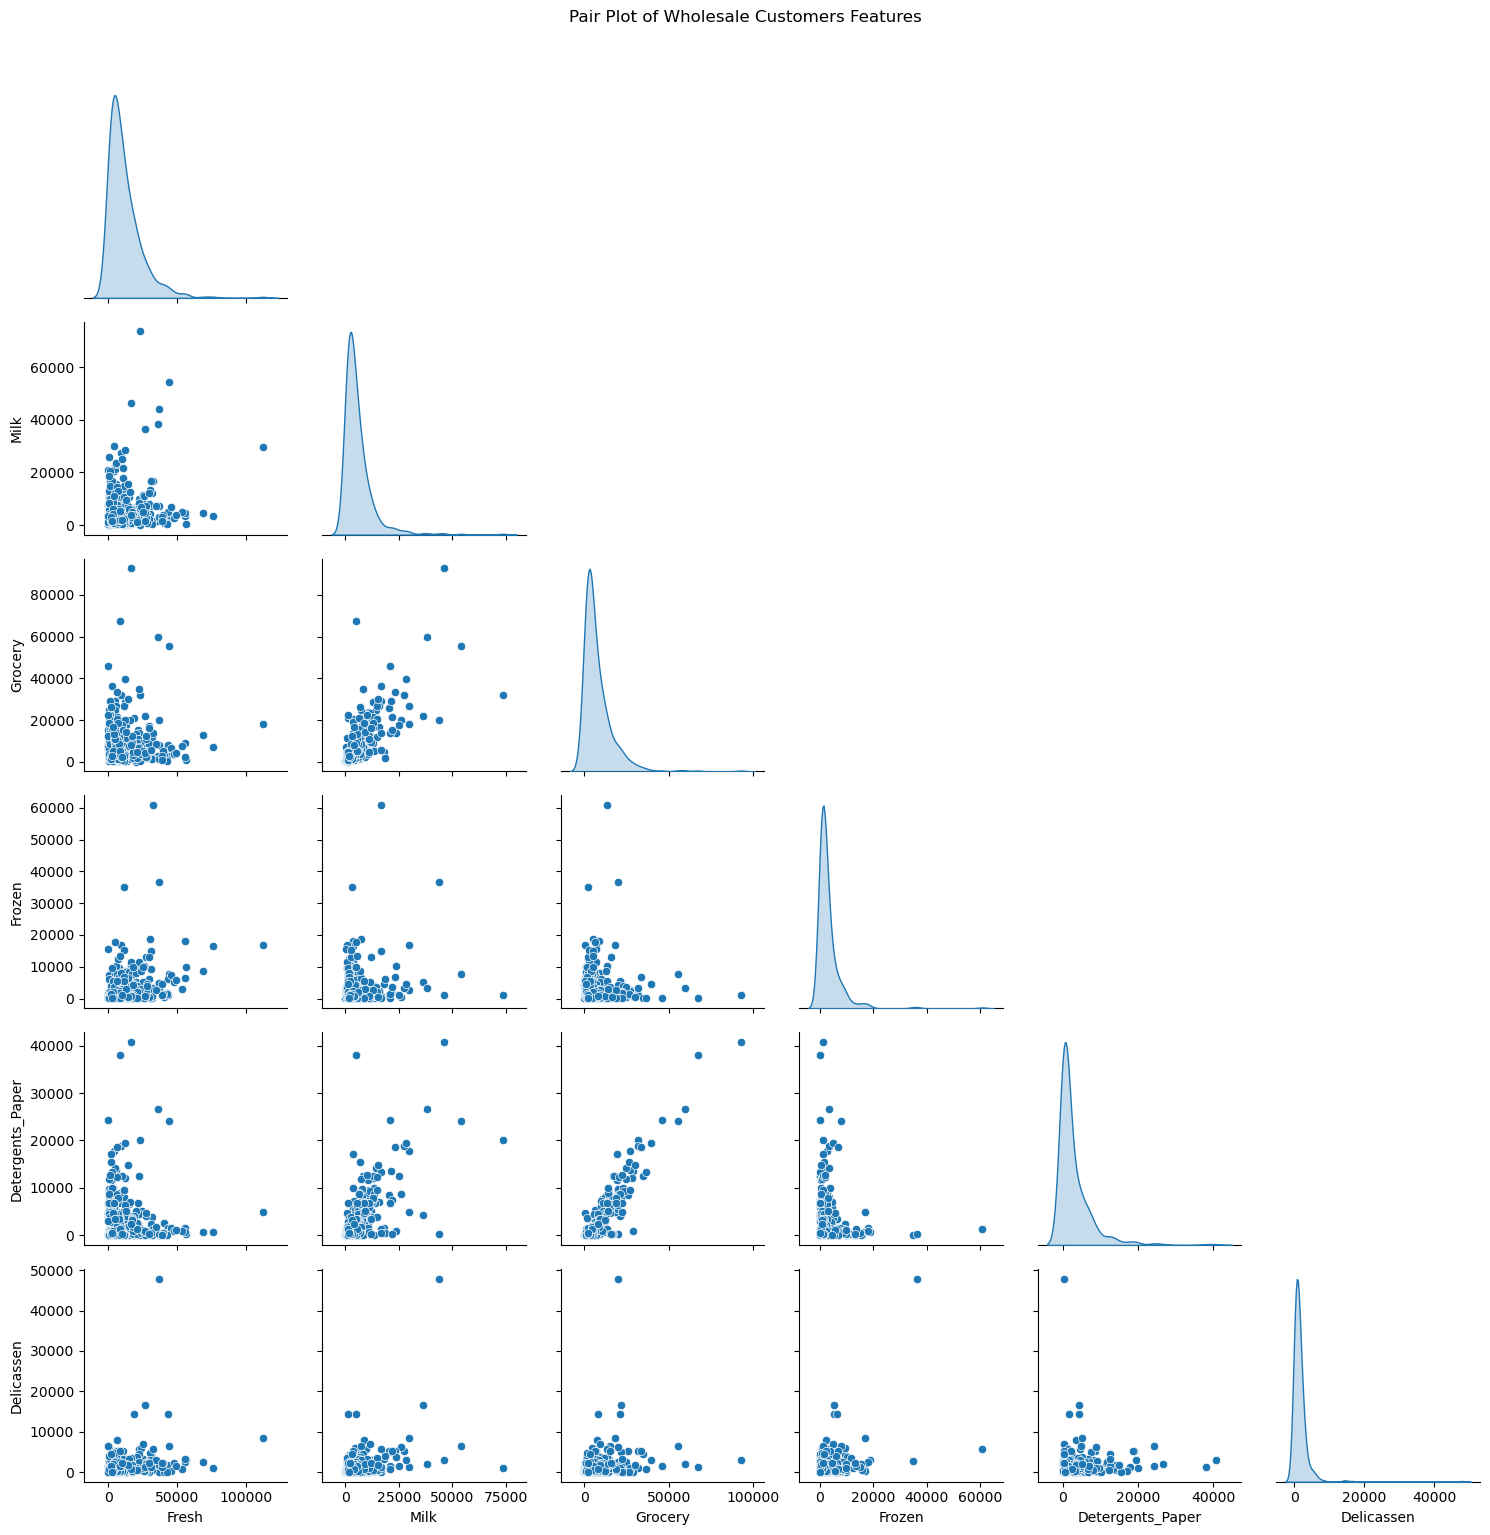

In [12]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Plot pairplot
sns.pairplot(df[features], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Wholesale Customers Features", y=1.02)
plt.tight_layout()
plt.show()

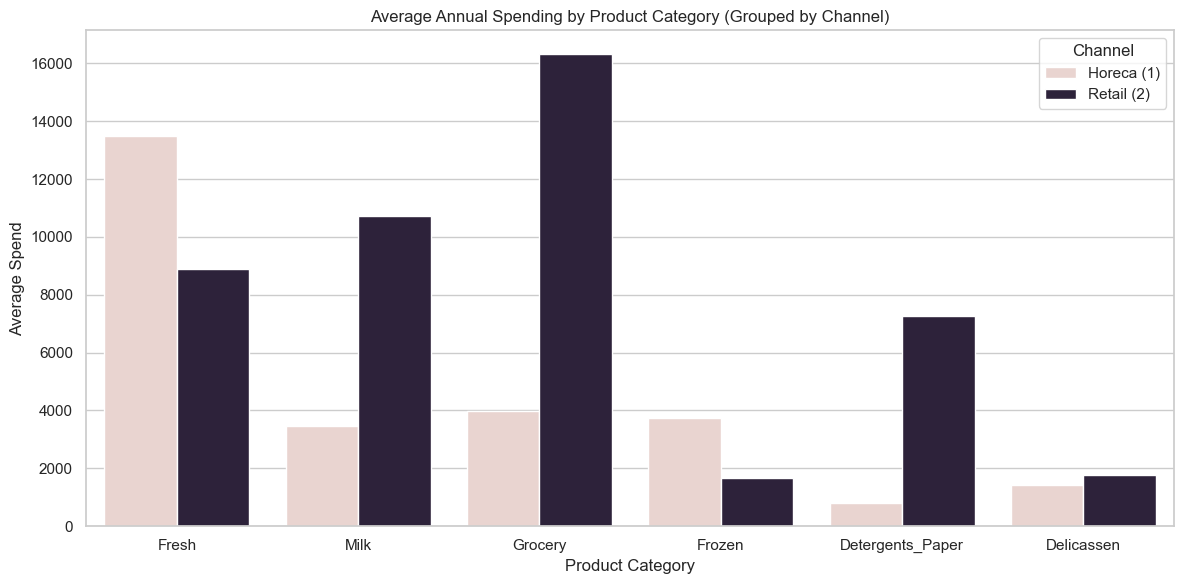

In [13]:
sns.set(style="whitegrid")

# Plot average spending by 'Channel'
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Melt the dataframe for bar plot
df_melted = df.melt(id_vars='Channel', value_vars=features,
                    var_name='Category', value_name='Annual Spend')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Category', y='Annual Spend', hue='Channel', ci=None)
plt.title('Average Annual Spending by Product Category (Grouped by Channel)')
plt.xlabel('Product Category')
plt.ylabel('Average Spend')
plt.legend(title='Channel', labels=['Horeca (1)', 'Retail (2)'])
plt.tight_layout()
plt.show()

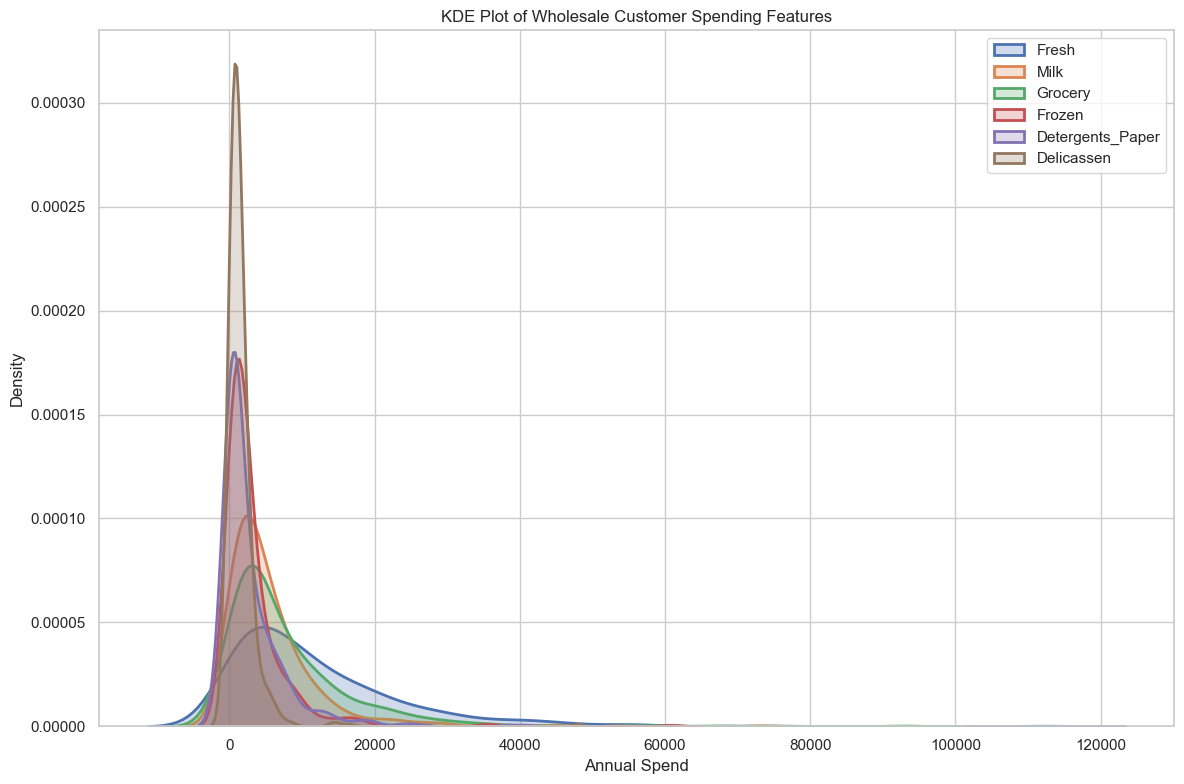

In [14]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Set up the plot
plt.figure(figsize=(12, 8))
for feature in features:
    sns.kdeplot(df[feature], label=feature, fill=True, linewidth=2)

plt.title("KDE Plot of Wholesale Customer Spending Features")
plt.xlabel("Annual Spend")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### SCALING :

In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

data_scaled=pd.DataFrame(data_scaled,columns=df.columns)

data_scaled


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


# PCA (Principal Component Analysis):

In [18]:
pca=PCA(n_components=2)
pca=pca.fit_transform(data_scaled)

In [19]:
pca

array([[ 8.43938928e-01, -5.15350749e-01],
       [ 1.06267645e+00, -4.84601258e-01],
       [ 1.26914052e+00,  6.82054553e-01],
       [-1.05678239e+00,  6.10821496e-01],
       [ 6.34030484e-01,  9.74198836e-01],
       [ 5.30110898e-01, -5.85411382e-01],
       [ 3.99560245e-01, -8.46342878e-01],
       [ 7.91165650e-01, -4.61140175e-01],
       [-6.63831131e-01, -5.77465454e-01],
       [ 2.15068480e+00, -6.17913981e-01],
       [ 1.25599389e+00, -5.12452434e-01],
       [-1.68210612e-01, -6.88796117e-01],
       [ 1.43985588e+00,  6.08852947e-01],
       [ 1.40695611e+00, -1.60564663e-01],
       [ 1.37395999e+00,  6.85013841e-02],
       [-1.07181521e+00, -5.19859188e-01],
       [ 1.25801233e+00, -1.12165441e+00],
       [-6.18599013e-01,  2.82406711e-01],
       [ 8.67093429e-01,  2.20448419e-01],
       [-4.84666795e-01, -5.76463994e-01],
       [ 3.31514687e-01, -1.94171620e-01],
       [-1.25444108e+00, -3.05734448e-01],
       [-6.95754707e-01,  2.16418147e+00],
       [ 4.

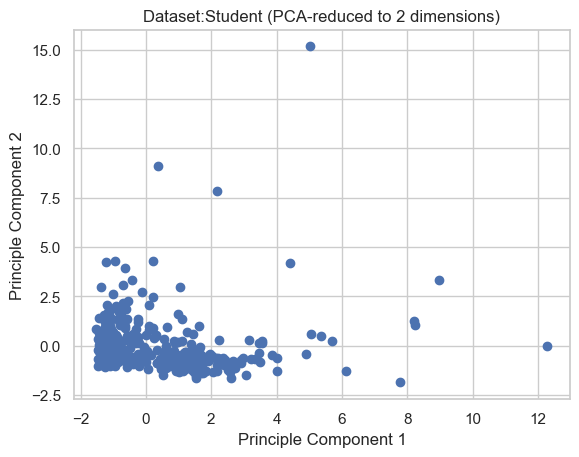

In [20]:
plt.scatter(pca[:,0],pca[:,1])
plt.title("Dataset:Student (PCA-reduced to 2 dimensions)")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

# DBSCAN(Density-Based Spatial Clustering of Applications with Noise):¶

In [22]:
epsilon=0.3
min_samples=5
dbscan=DBSCAN(eps=epsilon,min_samples=min_samples)
labels=dbscan.fit_predict(pca)

In [23]:
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


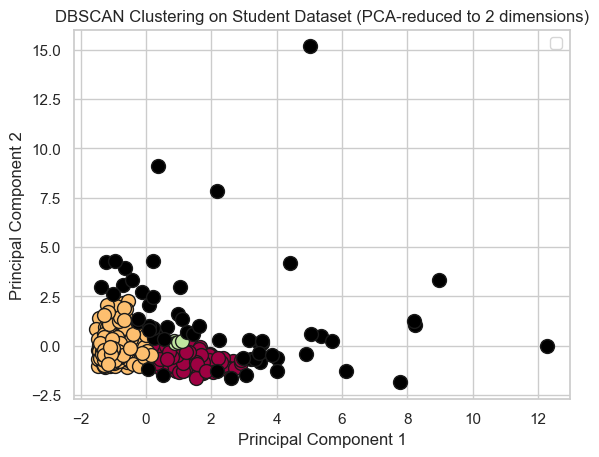

In [24]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)    #Creates a boolean array to identify points that belong to cluster k.
    xy = pca[class_member_mask]    #Apply the mask to X_reduced to get all data points in cluster k.
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on Student Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [25]:
sil_ahc=silhouette_score(pca,labels)

In [26]:
sil_ahc

0.3341790186718971

#  KMEAN CLUSTERING¶

* The K-Means algorithm effectively segmented the customers in the marketing dataset into distinct and meaningful groups based on purchasing behavior and demographic characteristics.


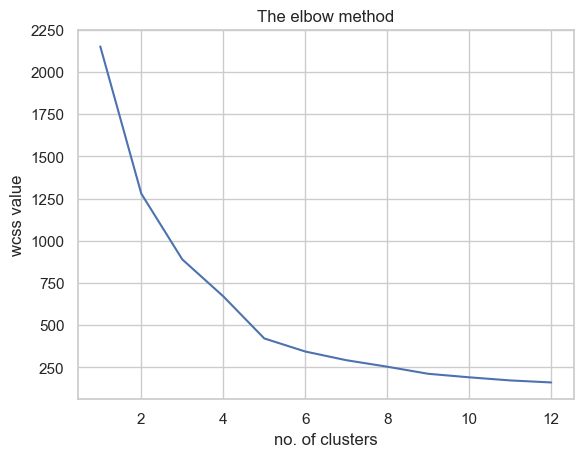

In [29]:
wcss = []
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)    
    kmeans.fit(pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss value')
plt.show()

In [30]:
kmeans=KMeans(n_clusters=3 ,init='k-means++',random_state=42)#random initialization method
y_kmeans=kmeans.fit_predict(pca)

In [31]:
y_kmeans

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [32]:
unique_labels = set(y_kmeans)

In [33]:
unique_labels

{0, 1, 2}

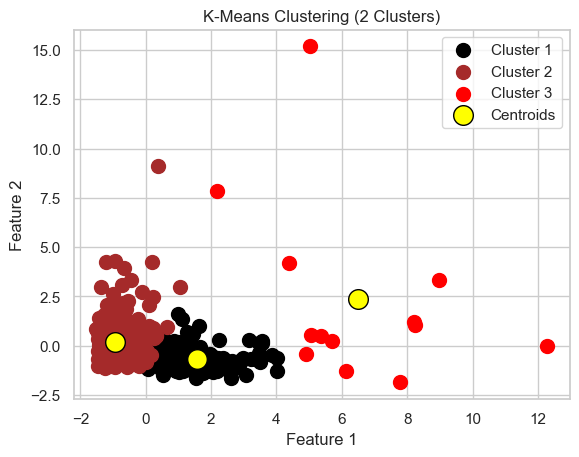

In [34]:
plt.scatter(pca[y_kmeans == 0, 0], pca[y_kmeans == 0, 1], s=100, c='black', label='Cluster 1')
plt.scatter(pca[y_kmeans == 1, 0], pca[y_kmeans == 1, 1], s=100, c='brown', label='Cluster 2')
plt.scatter(pca[y_kmeans == 2, 0], pca[y_kmeans == 2, 1], s=100, c='red', label='Cluster 3')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids', edgecolor='black')

plt.title('K-Means Clustering (2 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
sil_ahc=silhouette_score(pca,y_kmeans)

In [36]:
sil_ahc

0.5489547874755242

# AGGLOMERITIVE CLUSTERING:¶

* Agglomerative Clustering, a type of hierarchical clustering, was successfully applied to segment the customers in the marketing dataset. This method builds clusters step-by-step by merging the most similar data points, which results in a tree-like structure called a dendrogram.

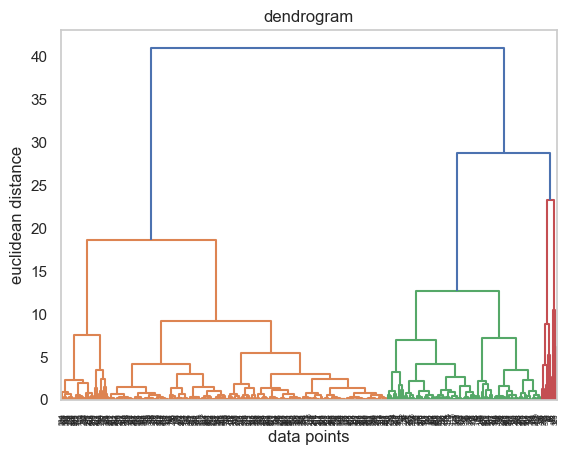

In [39]:
dendrogram=sch.dendrogram(sch.linkage(pca,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.grid(False)
plt.show()

In [77]:
ahc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(pca)
y_ahc

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [79]:
sil_ahc=silhouette_score(pca,y_ahc)
sil_ahc

0.5277226263245415